In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from river import drift
from sklearn.datasets import make_classification

In [2]:
def get_data():
    df  = pd.read_csv("rt_8873985678962563_abrupto.csv")

    features, labels = [], []

    for i in range(len(df)):
        features.append([df.loc[i, "X1"], df.loc[i, "X2"]])
        labels.append(df.loc[i, "class"])

    return np.array(features), np.array(labels)

# Generate the dataset
features, labels = get_data()

# features, labels

In [3]:
# Auxiliary function to plot the detected drifts
def plot_drifts(features, labels, drifts):
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.5, cmap='coolwarm')
    for drift_detected in drifts:
        plt.axvline(x=drift_detected, color='red', linestyle='--')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Detected Drifts')
    plt.show()

Change detected at index 11263
Change detected at index 20479
Change detected at index 31231


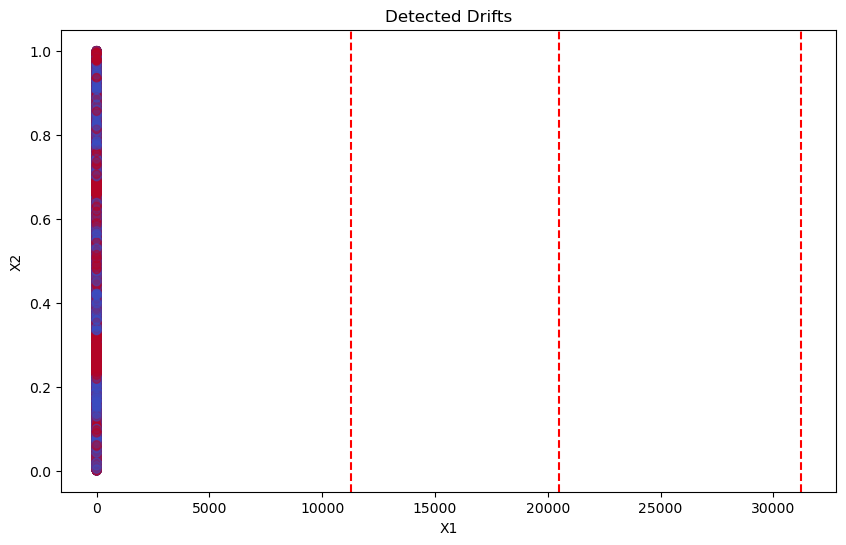

In [4]:
# Drift detection
drift_detector = drift.ADWIN()
drifts = []

for i, (feature, label) in enumerate(zip(features, labels)):
    drift_detector.update(label)   # Here we are using the label for drift detection
    if drift_detector.drift_detected:
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # Resetting the detector after a drift is detected


# print(drifts)
plot_drifts(features, labels, drifts)

Change detected at index 6742
Change detected at index 19079
Change detected at index 20045
Change detected at index 35900
Change detected at index 38601


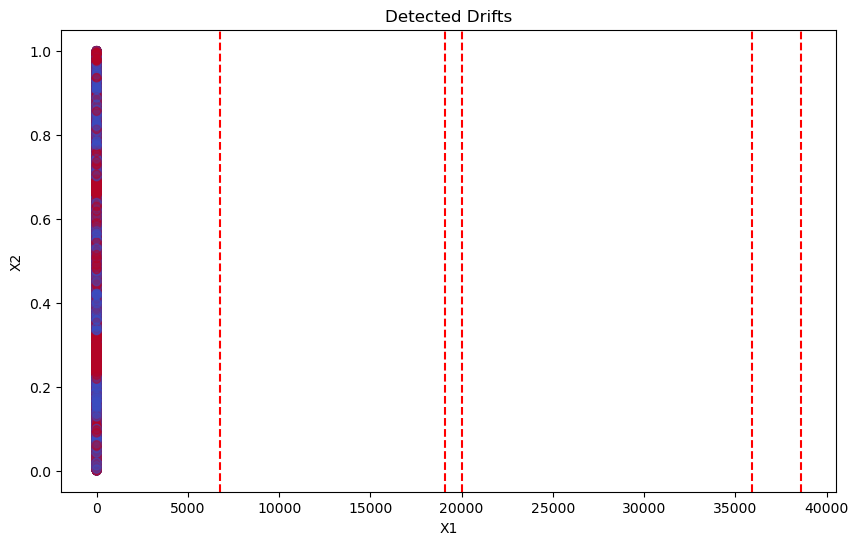

In [5]:
drift_detector = drift.KSWIN()
drifts = []

for i, (feature, label) in enumerate(zip(features, labels)):
    drift_detector.update(label)   # Here we are using the label for drift detection
    if drift_detector.drift_detected:
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # Resetting the detector after a drift is detected

# print(drifts)
plot_drifts(features, labels, drifts)

Change detected at index 299
Change detected at index 599
Change detected at index 899
Change detected at index 1199
Change detected at index 1499
Change detected at index 1799
Change detected at index 2099
Change detected at index 2399
Change detected at index 2699
Change detected at index 2999
Change detected at index 3299
Change detected at index 3599
Change detected at index 3899
Change detected at index 4199
Change detected at index 4499
Change detected at index 4799
Change detected at index 5099
Change detected at index 5399
Change detected at index 5699
Change detected at index 5999
Change detected at index 6299
Change detected at index 6599
Change detected at index 6899
Change detected at index 7199
Change detected at index 7499
Change detected at index 7799
Change detected at index 8099
Change detected at index 8399
Change detected at index 8699
Change detected at index 8999
Change detected at index 9299
Change detected at index 9599
Change detected at index 9899
Change detect

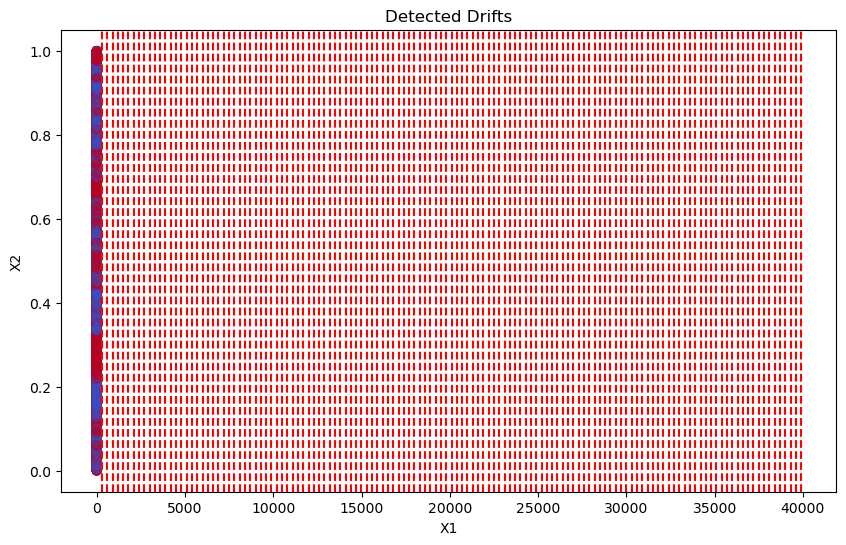

In [6]:
drift_detector = drift.DummyDriftDetector()
drifts = []

for i, (feature, label) in enumerate(zip(features, labels)):
    drift_detector.update(label)   # Here we are using the label for drift detection
    if drift_detector.drift_detected:
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # Resetting the detector after a drift is detected

# print(drifts)
plot_drifts(features, labels, drifts)

Change detected at index 8488
Change detected at index 10321
Change detected at index 20128
Change detected at index 26575
Change detected at index 30268


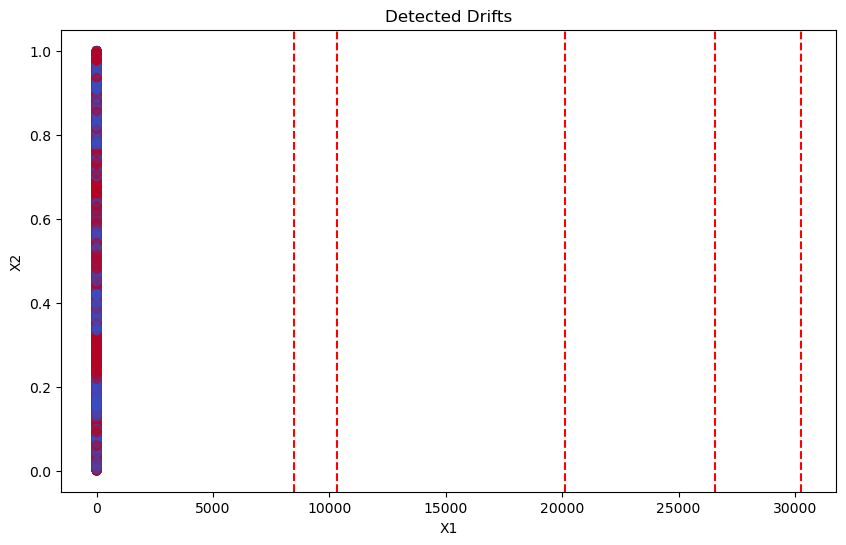

In [7]:
drift_detector = drift.PageHinkley()
drifts = []

for i, (feature, label) in enumerate(zip(features, labels)):
    drift_detector.update(label)   # Here we are using the label for drift detection
    if drift_detector.drift_detected:
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # Resetting the detector after a drift is detected

# print(drifts)
plot_drifts(features, labels, drifts)

In [8]:
# from river import naive_bayes, metrics, ensemble, preprocessing, linear_model, evaluate

# # Choose and Initialize Base Learners
# # learner = ensemble.ADWINBaggingClassifier(
# #     model=(
# #         preprocessing.StandardScaler() | linear_model.LogisticRegression()
# #     ),
# #     n_models=3,
# #     seed=42
# # )

# learner = ensemble.RandomForestClassifier(seed=8, leaf_prediction="mc")

# metric = metrics.F1()

# evaluate.progressive_val_score(zip(features, labels), learner, metric)

In [9]:
# from river import naive_bayes, metrics, ensemble, preprocessing, linear_model

# # Choose and Initialize Base Learners
# learner1 = ensemble.ADWINBaggingClassifier(
#     model=(
#         preprocessing.StandardScaler() | linear_model.LogisticRegression()
#     ),
#     n_models=3,
#     seed=42
# )
# # learner2 = naive_bayes.MultinomialNB()

# # Integrate Base Learners with Drift Detectors
# def evaluate_learner(learner, drift_detector, features, labels):
#     metric = metrics.ROCAUC()  # For AUC
#     accuracy_metric = metrics.Accuracy()  # For Accuracy

#     for i, (x, y) in enumerate(zip(features, labels)):
#         # Update the model and predict
#         y_pred = learner.predict_one(x)
#         learner.learn_one(x, y)

#         # Update metrics
#         metric.update(y, y_pred)
#         accuracy_metric.update(y, y_pred)

#         Drift detection
#         drift_detector.update(y_pred)
#         if drift_detector.drift_detected:
#             print(f'Change detected at index {i} for learner')
#             # Handle drift here (e.g., retrain model)

#     return metric, accuracy_metric

# # Step 3: Evaluate using Accuracy and AUC Metrics
# metric1, accuracy_metric1 = evaluate_learner(learner1, drift.ADWIN(), features, labels)
# # metric2, accuracy_metric2 = evaluate_learner(learner2, drift.KSWIN(), features, labels)

# print(f'Learner 1 - AUC: {metric1.get()}, Accuracy: {accuracy_metric1.get()}')
# # print(f'Learner 2 - AUC: {metric2.get()}, Accuracy: {accuracy_metric2.get()}')

In [15]:
from river import tree, ensemble, metrics

# Define base learners
learners = {
    'Decision Tree': tree.HoeffdingTreeClassifier(),
#     'Random Forest': ensemble.AdaptiveRandomForestClassifier()
}

detectors = {
    'ADWIN': drift.ADWIN(),
    'KSWIN': drift.KSWIN(),
}

# Evaluation
for learner_name, learner in learners.items():
    for detector_name, detector in detectors.items():
        metric = metrics.ROCAUC()
#         for X, y in data_stream:
        for i, (X, y) in enumerate(zip(features, labels)):
            # Predict
            y_pred = learner.predict_one(X)
            metric = metric.update(y, y_pred)
            
            # Train
            learner = learner.learn_one(X, y)
            
            # Check for drift
            in_drift, in_warning = detector.update(y_pred == y)
            if in_drift:
                learner.reset()  # Reset the model in case of drift

        print(f"{learner_name} with {detector_name}: AUC: {metric.get()}")

TypeError: '>' not supported between instances of 'NoneType' and 'float'